In [1]:
#한글 깨짐 방지 ->런타임 다시시작

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1. 제주도에는 여성의 비율이 더 높을까?
2. 혈액형 비율 표현하기
3. 제주도의 성별 인구 비율 표현하기


In [3]:

import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

name = input('찾고 싶은 지역명을 입력해주세요 :')

m = []
f = []

for row in data:
  if name in row[0]:
    for i in row[3:104] :  # 남성 데이터 컬럼 3~103 개의 데이터를 슬라이싱 - 정수 데이터로 변환 -> m리스트에 저장
      m.append(-(int(i.replace(',',''))))  # 항아리 차트를 그리기 위해 음수로 변환 시키는 작업을 먼저 해준다.
    for j in row[106:] :  # 여성 데이터 : 106~ 끝까지 데이터 슬라이싱 -> 정수 데이터로 변환 -> fe리스트에 저장
      f.append(int(j.replace(',','')))
    break  # 첫번째 데이터만 확인하고 탈출하기 위해서

# 시각화 설정
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

plt.title(name + '지역의 남녀 성별 인구 분포')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.barh(range(101),m, label='남성')
plt.barh(range(101),f, label='여성')
plt.legend()
plt.show()

FileNotFoundError: ignored

제주특별자치도 데이터 확인->101개여야 하는데. 4646->46배 큰 값-> 제주특별자치도 포함된 지역 이름이 총46건

In [10]:
print(len(m), len(fe))

101 101


항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie

pie()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.pie([10,20]) # pie(x) x가 가지고 있는 값을 비율로 표시
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size=[2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']


plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', explode=(0,0,0.1,0), colors=color) #혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

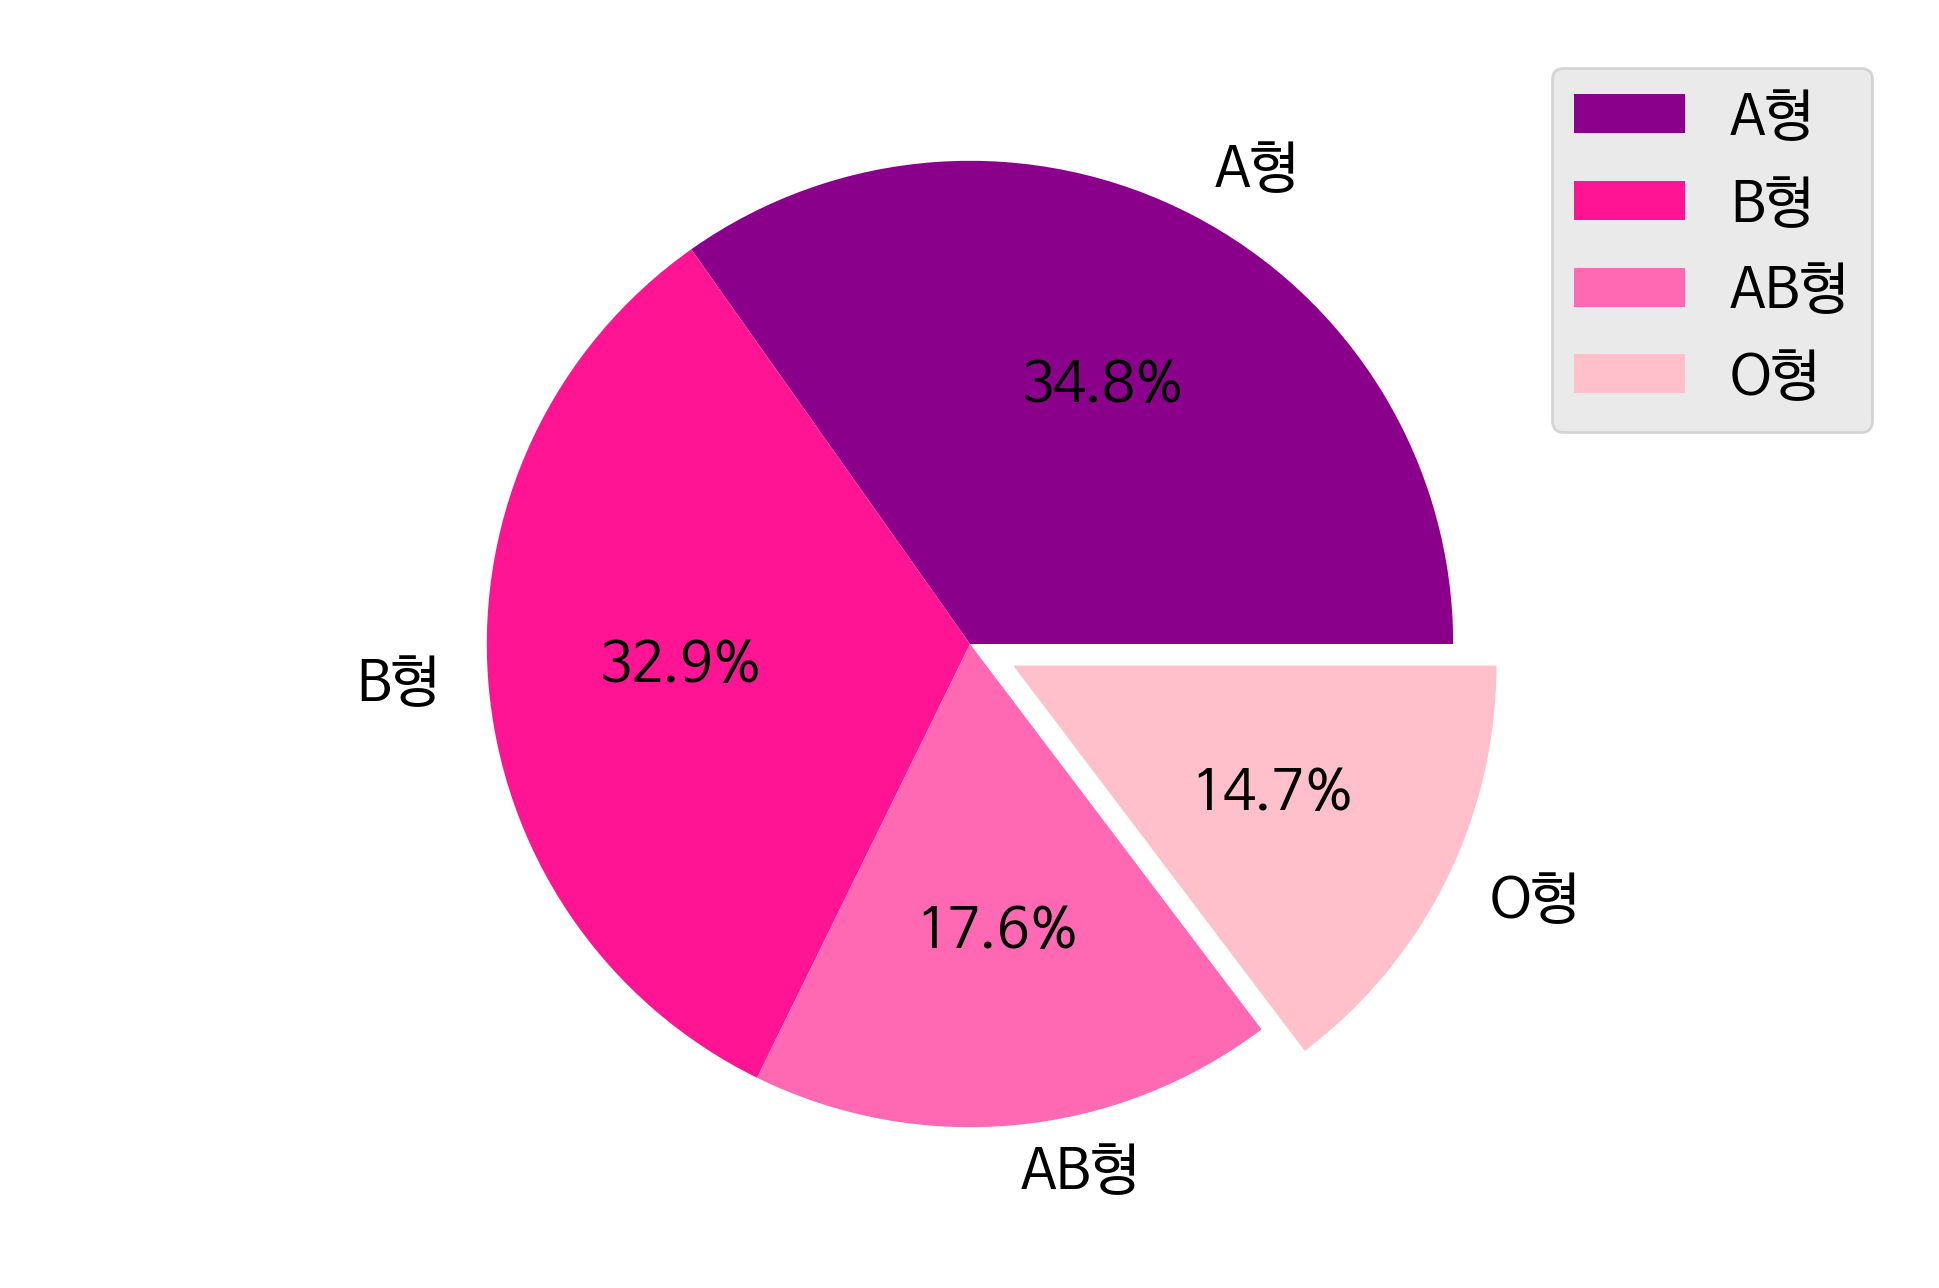

In [31]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size=[2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']


plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', explode=(0,0,0,0.1), colors=color) #혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

# 내가 설명하지 않아도 이해할 수 있도록 시각화...ㅠㅅㅠ

제주도의 성별 인구 비율 표현하기

찾고 싶은 지역명을 입력해주세요 :제주특별자치도


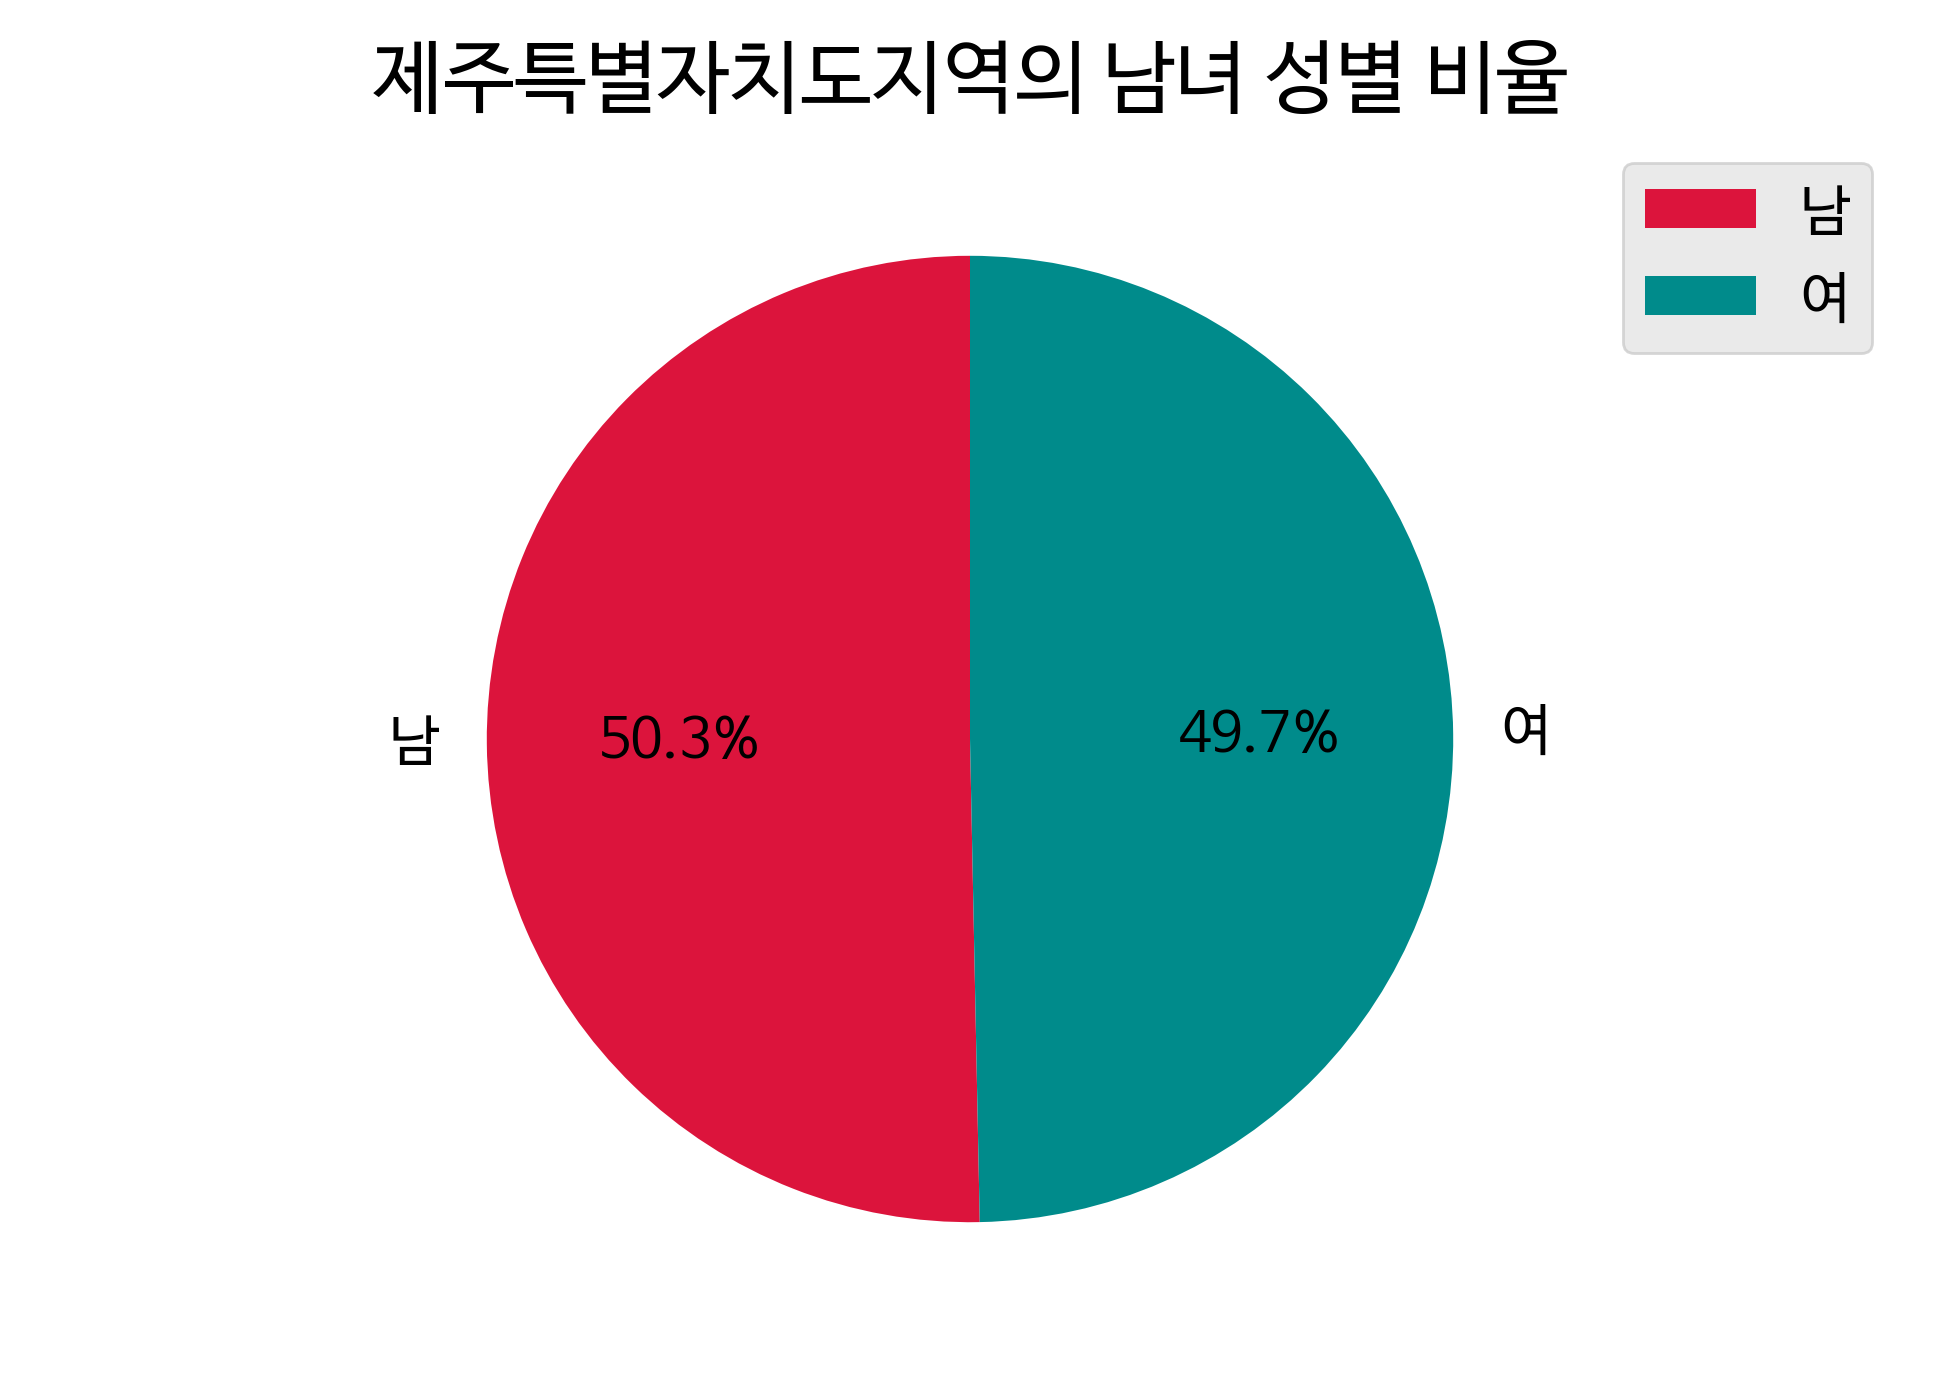

In [36]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
header=next(data)

name = input('찾고 싶은 지역명을 입력해주세요 :')

size = [] #제주도의 남성 인구 합계, 여성 인구 합계


for row in data:
  if name in row[0]:
    m = 0 #남성 인구수 합계 변수
    f = 0 #여성 인구수 합계 변수
    for i in range(101) :
      m += int(row[3+i].replace(',', '')) # m = m+int(row[3+i]. replace(',', ''))
      f += int(row[106+i].replace(',', '')) # f = f+int)row[106+i], replace(',', ''))
  
    break  # 첫번째 데이터만 확인하고 탈출하기 위해서

size.append(m)
size.append(f)

# 파이 차트 시각화 설정
color = ['crimson', 'darkcyan']
label =['남', '여']
plt.figure(dpi = 200)
plt.style.use('ggplot')

plt.axis('equal')
plt.pie(size, startangle=90, labels=label, autopct='%.1f%%', colors=color) #혈액형의 비율을 임의로 작성
plt.title(name+ '지역의 남녀 성별 비율')
plt.legend()
plt.show()